#Clasificación con Regresión Logística

**Es una tecnica que permite estimar la probabilidad de ocurrencia de un evento**

#Importacion de Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Funciones

In [2]:
def analizadorNulos(data):
    
    qFilas, qColumnas = data.shape
    if data.isnull().any().any():
        view_info = pd.DataFrame(pd.concat([data.isnull().any(), data.isnull().sum(), 
                                            round(data.isnull().sum() / qFilas * 100, 2), data.dtypes], axis=1))
        view_info.columns = ['Nulos', 'Cantidad', '%_Nulos', 'Tipo_Dato']
        view_info.sort_values(by='%_Nulos', ascending = False, inplace = True)
        display(view_info[view_info['Cantidad'] > 0])
        #Graficando el porcentaje de nulos
        plt.figure(figsize=(10,7))
        plt.title('Porcentaje de Nulos', fontsize = 15)
        plt.grid(True)
        plt.yticks(range(qColumnas + 1, 1 , -1), view_info.index, fontsize=20)
        plt.xlabel("Porcentaje de Nulos",fontsize=15)
        plt.ylabel("Variables\n",fontsize=20)
        #plt.xlim(0,100)
        plt.barh(range(qColumnas + 1, 1 , -1), width=view_info['%_Nulos'],height=0.5)
        #print(list(enumerate(view_info['%_Nulos'], 1)))
        for i, txt in enumerate(view_info['%_Nulos']):
          plt.annotate(str(txt) + '%', (txt, (qColumnas + 1 - i) ), fontsize = 12)
    else:
        print("No existen Nulos")

def analisisCategoricas(df, variable):
  frecuencia_absoluta = pd.DataFrame(df[variable].astype('str').fillna('Nulo').value_counts(dropna = False))
  frecuencia_absoluta.columns = ['FREC_ABS'] 
  #display(frecuencia_absoluta)
  frecuencia_relativa = pd.DataFrame(df[variable].astype('str').fillna('Nulo').value_counts(normalize = True, dropna = False))
  frecuencia_relativa.columns = ['FREC_REL'] 
  #display(frecuencia_relativa)
  tablaResumen = pd.concat([frecuencia_absoluta,frecuencia_relativa], axis = 1)
  display(tablaResumen)
  tablaResumen
  #Graficando las distribuciones
  plt.bar(x = tablaResumen.index, height = tablaResumen['FREC_ABS'])
  for i, txt in enumerate(tablaResumen['FREC_ABS']):
    plt.annotate(str(txt), (i, txt), fontsize = 12)
  plt.twinx()
  plt.plot(tablaResumen['FREC_REL'], linestyle='-', linewidth=2.0, color='red')
  plt.ylim(0, 1)
  for i, txt in enumerate(tablaResumen['FREC_REL']):
    plt.annotate(str(round(txt * 100, 1)) + '%', (i, txt), fontsize = 12, ha='center')
  plt.show()

def analisisNumericas(df, variable):

  print(" "*20,"Histograma"," "*20)
  df[variable].plot.hist(bins=25,figsize=(8,4))
  plt.show()
  print("\n")
  print(" "*20,"Boxplot"," "*20)
  df[variable].plot.box(figsize=(8,4))
  plt.show()

def analisisBivariante(data, variable, target, qCortes = 0):
    
    df = data.copy()
    if qCortes > 0:
      df[variable] = pd.qcut(df[variable], qCortes, duplicates='drop')
      df[variable] = df[variable].astype('str')
    if df[variable].isnull().any():
      df[variable] = df[variable].astype('str')
    prueba = pd.concat([df.groupby(variable).sum()[[target]].sort_index(),
                        df[variable].value_counts()], axis = 1)
    prueba['%_Target'] = prueba[target] / prueba[variable]
    display(prueba)
    #Graficando las distribuciones
    plt.bar(x = prueba.index, height = prueba[variable])
    plt.grid(True)
    if qCortes > 0:
      plt.xticks(rotation=-45)
    for i, txt in enumerate(prueba[variable]):
      plt.annotate(str(txt), (i, txt), fontsize = 12)
    #plt.title(variable)
    plt.twinx()
    plt.plot(prueba['%_Target'], linestyle='-', linewidth=2.0, color='red')
    plt.ylim(0, 1)
    for i, txt in enumerate(prueba['%_Target']):
      plt.annotate(str(round(txt * 100, 1)) + '%', (i, txt), fontsize = 12, ha='center')

    # sns.boxplot(x='response', y=columna, data=df)
    plt.show()

# 1.- Comprension del Negocio

**La entidad financiera en estudio desea elevar sus ratios de aceptación para el producto del prestamo hipotecario por lo que desea identificar que clientes son más propensos a acpetar el producto hipotecario en cuestión.**

# 2.- Comprension de los Datos

**En esta etapa nos avocaremos a conocer todo lo referente a los datos con los que contamos**

## 2.1.- Recopilacion de los Datos

In [3]:
#Importamos los datos
df = pd.read_csv('https://raw.githubusercontent.com/aldochavez/datasets/main/AdquisicionCreditoHipotecario.csv', index_col=False)

In [4]:
#Visualizamos los datos
df.head()

,Loan ID,Gender,Married,Dependents,Education,Self Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 2.2.- Descripcion de los Datos

<figure>
<center>
<img src='https://raw.githubusercontent.com/aldochavez/datasets/main/Descripcion_Datos.PNG' />
<figcaption>Descripcion de los Datos</figcaption></center>
</figure>

## 2.3.- Exploracion de los Datos

**Aplicaremos diversas técnicas estadísticas para conocer más a profundidad los datos**

### 2.3.1.- Analisis de Nulos

,Nulos,Cantidad,%_Nulos,Tipo_Dato
Credit History,True,50,8.14,float64
Self Employed,True,32,5.21,object
LoanAmount,True,22,3.58,float64
Dependents,True,15,2.44,object
Loan_Amount_Term,True,14,2.28,float64
Gender,True,13,2.12,object
Married,True,3,0.49,object


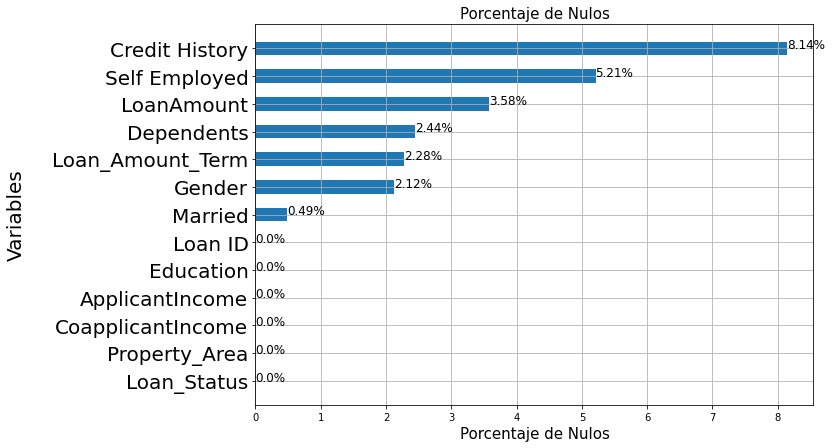

In [5]:
analizadorNulos(df)

In [6]:
#Definimos las variables que trataremos como numericas y como categoricas
varCategoricas = ['Gender','Married','Dependents','Education','Self Employed','Credit History','Property_Area']
varNumericas = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
target = 'Loan_Status'

### 2.3.2.- Analisis Univariante

**El objetivo de este analisis es caracterizar a las variables por sus estadisticos resumen principales (media, mediana, moda, etc)**

#### 2.3.2.1.- Analisis Univariante Categoricas

-------------------- Gender --------------------


,FREC_ABS,FREC_REL
Male,489,0.796417
Female,112,0.182410
nan,13,0.021173


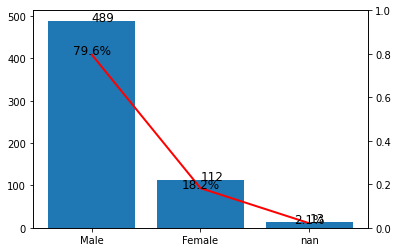




-------------------- Married --------------------


,FREC_ABS,FREC_REL
Yes,398,0.648208
No,213,0.346906
nan,3,0.004886


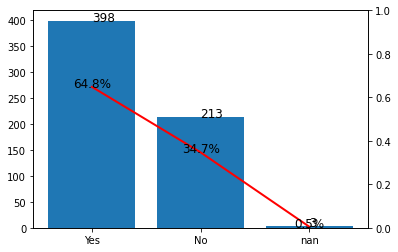




-------------------- Dependents --------------------


,FREC_ABS,FREC_REL
0,345,0.561889
1,102,0.166124
2,101,0.164495
3+,51,0.083062
nan,15,0.024430


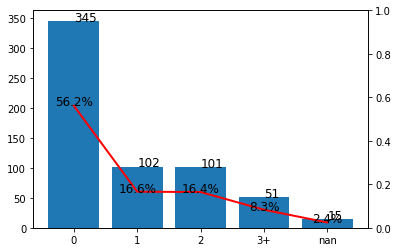




-------------------- Education --------------------


,FREC_ABS,FREC_REL
Graduate,480,0.781759
Not Graduate,134,0.218241


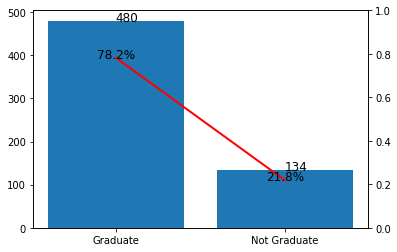




-------------------- Self Employed --------------------


,FREC_ABS,FREC_REL
No,500,0.814332
Yes,82,0.133550
nan,32,0.052117


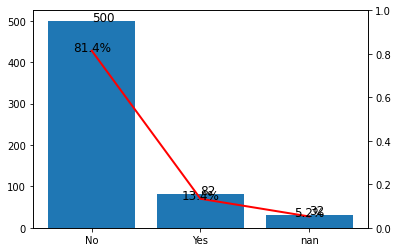




-------------------- Credit History --------------------


,FREC_ABS,FREC_REL
1.0,475,0.773616
0.0,89,0.144951
nan,50,0.081433


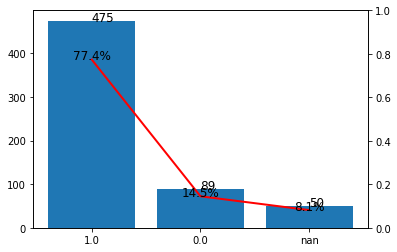




-------------------- Property_Area --------------------


,FREC_ABS,FREC_REL
Semiurban,233,0.379479
Urban,202,0.328990
Rural,179,0.291531


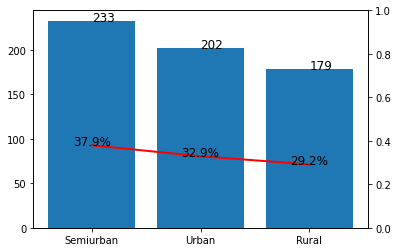

In [7]:
#Sacamos el analisis categorico para cada variable
for categorica in varCategoricas:
    print("-"*20,categorica,"-"*20)
    analisisCategoricas(df, categorica)
    print("\n\n")

#### 2.3.2.2.- Analisis Univariante Numericas

In [8]:
#Hacemos un analisis de Percentiles
df[varNumericas].describe(percentiles=[0.05,0.25,0.5,0.75,0.95]).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,1897.55,2877.5,3812.5,5795.00,14583.0,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,0.0,1188.5,2297.25,4997.4,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,56.00,100.0,128.0,168.00,297.8,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,180.00,360.0,360.0,360.00,360.0,480.0


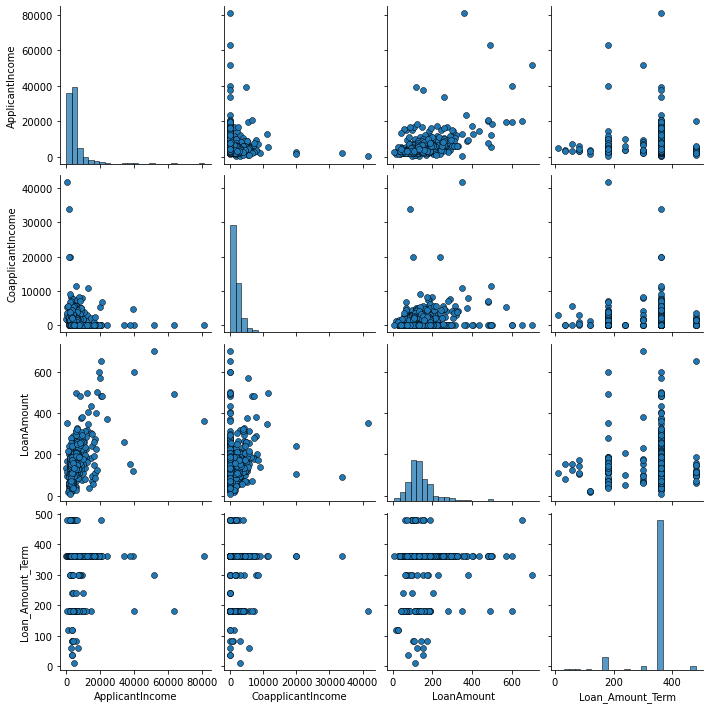

In [9]:
sns.pairplot(data=df[varNumericas], diag_kws={'edgecolor':'k','bins':25}, plot_kws={'edgecolor':'k'})
plt.show()

#################### ApplicantIncome ####################
                     Histograma                     


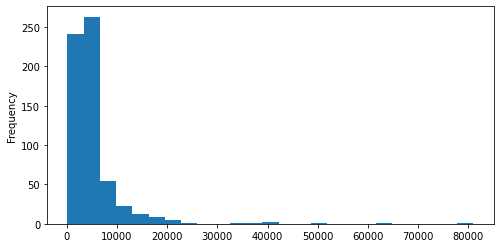



                     Boxplot                     


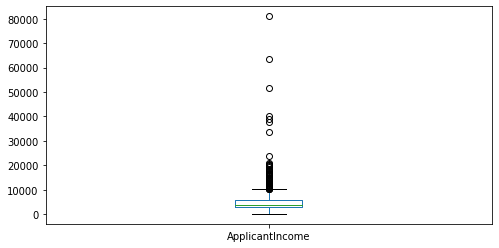




#################### CoapplicantIncome ####################
                     Histograma                     


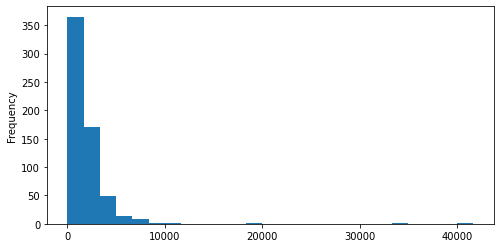



                     Boxplot                     


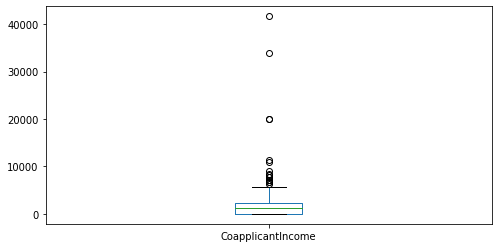




#################### LoanAmount ####################
                     Histograma                     


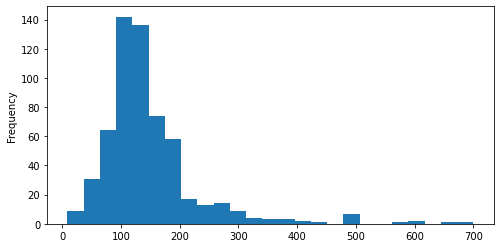



                     Boxplot                     


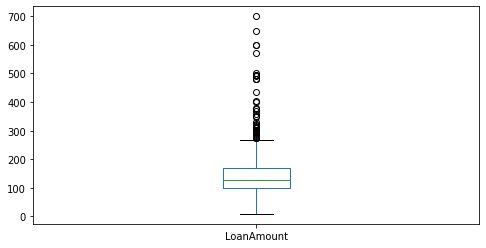




#################### Loan_Amount_Term ####################
                     Histograma                     


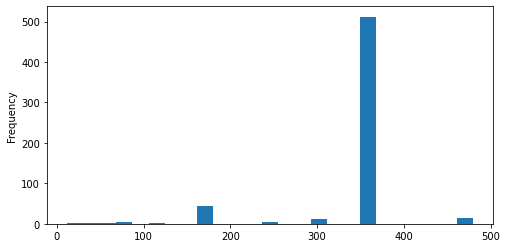



                     Boxplot                     


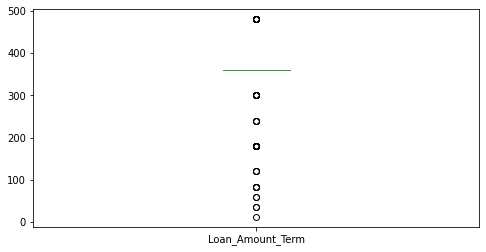

In [10]:
for numerica in varNumericas:
  print("#"*20,numerica,"#"*20)
  analisisNumericas(df, numerica)
  print("\n\n")

#### 2.3.2.2.- Analisis Univariante Target

,FREC_ABS,FREC_REL
Y,422,0.687296
N,192,0.312704


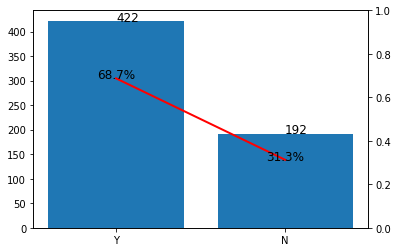

In [11]:
#Analisis Target
analisisCategoricas(df, target)

### 2.3.3.- Analisis Bivariante

**Analizamos las variables comparandolas con la variable objetivo**

In [12]:
#Transformamos la variable respuesta a una variable binaria
df[target] = df[target].replace(['Y','N'],[1,0])

#### 2.3.3.1.- Analisis Bivariante Categoricas

------------------------ Gender ------------------------


,Loan_Status,Gender,%_Target
Female,75,112,0.669643
Male,339,489,0.693252
nan,8,13,0.615385


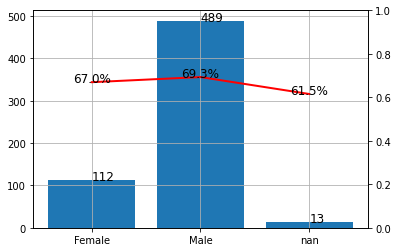




------------------------ Married ------------------------


,Loan_Status,Married,%_Target
No,134,213,0.629108
Yes,285,398,0.716080
nan,3,3,1.000000


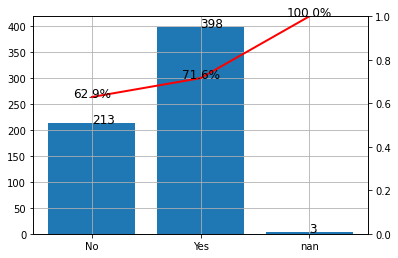




------------------------ Dependents ------------------------


,Loan_Status,Dependents,%_Target
Dependents,,,
0,238,345,0.689855
1,66,102,0.647059
2,76,101,0.752475
3+,33,51,0.647059
nan,9,15,0.600000


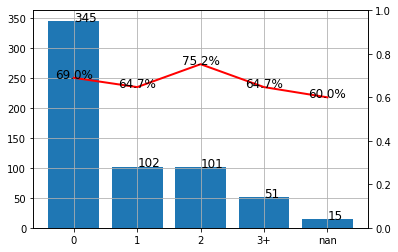




------------------------ Education ------------------------


,Loan_Status,Education,%_Target
Education,,,
Graduate,340,480,0.708333
Not Graduate,82,134,0.611940


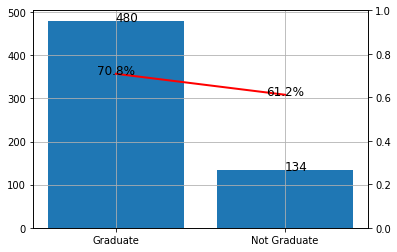




------------------------ Self Employed ------------------------


,Loan_Status,Self Employed,%_Target
Self Employed,,,
No,343,500,0.686000
Yes,56,82,0.682927
nan,23,32,0.718750


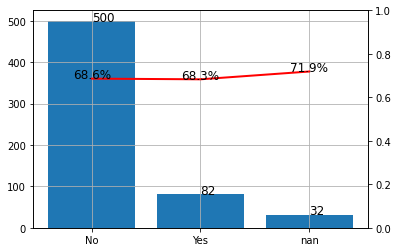




------------------------ Credit History ------------------------


,Loan_Status,Credit History,%_Target
0.0,7,89,0.078652
1.0,378,475,0.795789
nan,37,50,0.740000


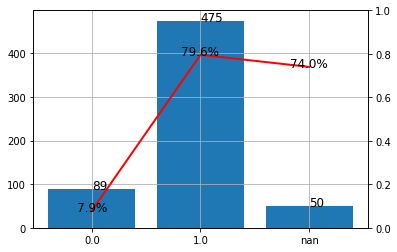




------------------------ Property_Area ------------------------


,Loan_Status,Property_Area,%_Target
Rural,110,179,0.614525
Semiurban,179,233,0.768240
Urban,133,202,0.658416


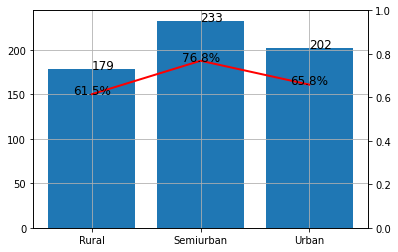

In [13]:
# Visualización Variables Numéricas:
for col in varCategoricas:
    print("------------------------",col,"------------------------")
    analisisBivariante(df, col, target)
    print("\n\n")
#analisisBivariante(df, 'Gender', target)

#### 2.3.3.2.- Analisis Bivariante Numericas

------------------------ ApplicantIncome ------------------------


,Loan_Status,ApplicantIncome,%_Target
"(149.999, 2605.4]",85,123,0.691057
"(2605.4, 3406.8]",87,123,0.707317
"(3406.8, 4343.6]",84,122,0.688525
"(4343.6, 6252.4]",82,123,0.666667
"(6252.4, 81000.0]",84,123,0.682927


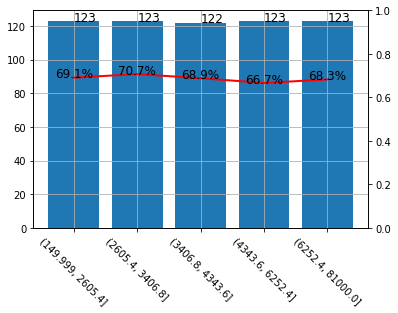




------------------------ CoapplicantIncome ------------------------


,Loan_Status,CoapplicantIncome,%_Target
"(-0.001, 1689.6]",250,368,0.679348
"(1689.6, 2535.0]",91,123,0.739837
"(2535.0, 41667.0]",81,123,0.658537


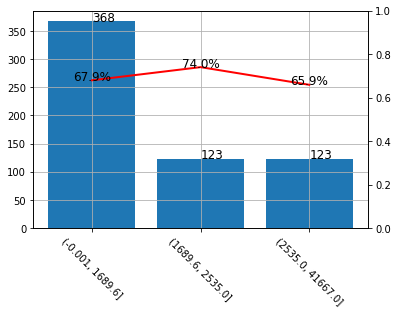




------------------------ LoanAmount ------------------------


,Loan_Status,LoanAmount,%_Target
"(116.0, 137.0]",87,115,0.756522
"(137.0, 182.0]",81,120,0.675000
"(182.0, 700.0]",76,116,0.655172
"(8.999, 95.0]",82,120,0.683333
"(95.0, 116.0]",85,121,0.702479
nan,11,22,0.500000


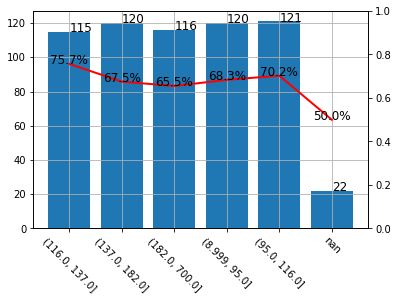




------------------------ Loan_Amount_Term ------------------------


,Loan_Status,Loan_Amount_Term,%_Target
Loan_Amount_Term,,,
"(11.999, 360.0]",408,585,0.697436
"(360.0, 480.0]",6,15,0.400000
nan,8,14,0.571429


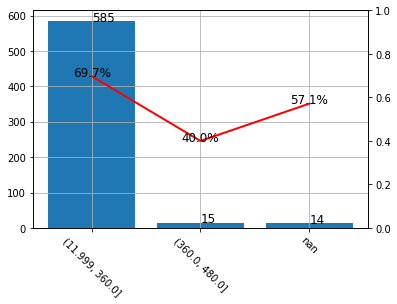

In [14]:
# Visualización Variables Numéricas:
for col in varNumericas:
    print("------------------------",col,"------------------------")
    analisisBivariante(df, col, target, 5)
    print("\n\n")
#analisisBivariante(df, 'Gender', target)

### 2.3.4.- Analisis de Correlaciones

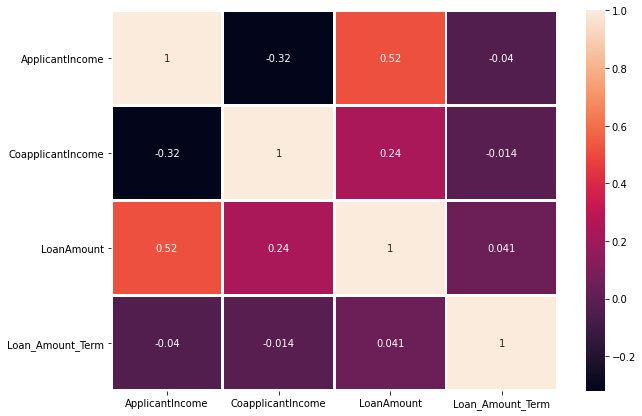

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(df[varNumericas].corr(method='spearman'), annot=True, linewidths=2)

# 3.- Preparacion de los datos

**Nos centraremos en generar el conjunto de datos con el cual entrenamos en nuestro modelo**

## 3.1.- Seleccion de los Datos

**Usaremos todas las variables para las siguientes etapas a excepcion del ID**

In [ ]:
#Nos quedaremos con una lista de predictoras y la target
predictoras = ['Gender', 'Married', 'Dependents', 'Education','Self Employed',
               'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term',
               'Credit History', 'Property_Area']
target = 'Loan_Status'

## 3.2.- Limpieza de Datos

**Corregimos anomalías como datos perdidos o valores outliers**

### 3.2.1.- Limpieza de Missings

In [16]:
# Imputaremos Genero por la Moda
df['Gender'] = df['Gender'].fillna('Male')
# Imputaremos Estado Civil por la Moda
df['Married'] = df['Married'].fillna('Yes')
# Imputaremos la cantidad de dependientes por la Moda
df['Dependents'] = df['Dependents'].fillna('0')
# Formaremos un nuevo grupo con la variable auoempleado
df['Self Employed'] = df['Self Employed'].fillna('Nulo')
# Formaremos un nuevo grupo con la variable Historial de credito
df['Credit History'] = df['Credit History'].fillna(0.5)
# Imputaremos la cantidad de Monto de prestamo por la mediana
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
# Imputaremos la cantidad de dependientes por la Moda
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360)

In [17]:
#Volvemos a revisar los nulos
analizadorNulos(df)

No existen Nulos


### 3.2.1.- Tratamiento de Outliers

**Podemos topear la variable o discretizar**

In [18]:
# Vamos a topear la variable Ingresos Dependientes en 30 000
df.loc[df['ApplicantIncome'] >= 30000,'ApplicantIncome'] = 30000
# Vamos a topear la variable Ingresos Independientes en 15 000
df.loc[df['CoapplicantIncome'] >= 15000,'CoapplicantIncome'] = 15000

In [19]:
df.head()

,Loan ID,Gender,Married,Dependents,Education,Self Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


## 3.3.- Ingeniería de Variables

In [20]:
# Creamos la variable Ingreso Total
df['Ingreso_Total'] = df['ApplicantIncome'] + df['CoapplicantIncome']
# Creamos la variable Cuota
df['Cuota'] = (df['LoanAmount'] / df['Loan_Amount_Term']) * 1000
# Creamos la variable Porcentaje Cuota
df['PCT_Cuota'] = df['Cuota'] / df['Ingreso_Total']

In [21]:
#Visualizamos las nuevas variables
df.head()

,Loan ID,Gender,Married,Dependents,Education,Self Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status,Ingreso_Total,Cuota,PCT_Cuota
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0,355.555556,0.060789
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,355.555556,0.058374
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,183.333333,0.061111
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,333.333333,0.067463
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,391.666667,0.065278


## 3.4.- Formateo de los Datos

In [23]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [24]:
# Formateamos la variable Genero
df.loc[df['Gender'] == 'Male','Gender'] = 1
df.loc[df['Gender'] == 'Female','Gender'] = 0
df['Gender'] = df['Gender'].astype(int)
# Formateamos la variable Estado Civil
df.loc[df['Married'] == 'Yes','Married'] = 1
df.loc[df['Married'] == 'No','Married'] = 0
df['Married'] = df['Married'].astype(int)
# Formateamos la variable Dependientes
df.loc[df['Dependents'] == '3+','Dependents'] = 3
df['Dependents'] = df['Dependents'].astype(int)
# Formateamos la variable Educacion
df.loc[df['Education'] == 'Graduate','Education'] = 1
df.loc[df['Education'] == 'Not Graduate','Education'] = 0
df['Education'] = df['Education'].astype(int)
# Formateamos la variable Autoempleado
df.loc[df['Self Employed'] == 'Nulo','Self Employed'] = 0
df.loc[df['Self Employed'] == 'No','Self Employed'] = 0.5
df.loc[df['Self Employed'] == 'Yes','Self Employed'] = 1
df['Self Employed'] = df['Self Employed'].astype(float)
# Formateamos la variable Area
df.loc[df['Property_Area'] == 'Rural','Property_Area'] = 0
df.loc[df['Property_Area'] == 'Urban','Property_Area'] = 0.5
df.loc[df['Property_Area'] == 'Semiurban','Property_Area'] = 1
df['Property_Area'] = df['Property_Area'].astype(float)

In [25]:
df.dtypes

Loan ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit History       float64
Property_Area        float64
Loan_Status            int64
Ingreso_Total        float64
Cuota                float64
PCT_Cuota            float64
dtype: object

In [26]:
#visualizamos el dataframe formateado
df.head()

,Loan ID,Gender,Married,Dependents,Education,Self Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status,Ingreso_Total,Cuota,PCT_Cuota
0,LP001002,1,0,0,1,0.5,5849,0.0,128.0,360.0,1.0,0.5,1,5849.0,355.555556,0.060789
1,LP001003,1,1,1,1,0.5,4583,1508.0,128.0,360.0,1.0,0.0,0,6091.0,355.555556,0.058374
2,LP001005,1,1,0,1,1.0,3000,0.0,66.0,360.0,1.0,0.5,1,3000.0,183.333333,0.061111
3,LP001006,1,1,0,0,0.5,2583,2358.0,120.0,360.0,1.0,0.5,1,4941.0,333.333333,0.067463
4,LP001008,1,0,0,1,0.5,6000,0.0,141.0,360.0,1.0,0.5,1,6000.0,391.666667,0.065278


In [27]:
df.columns

Index(['Loan ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit History', 'Property_Area', 'Loan_Status',
       'Ingreso_Total', 'Cuota', 'PCT_Cuota'],
      dtype='object')

# 4.- Modelado

**Nuestro objetivo principal es obtener el modelo**

In [29]:
#Elegimos las variables predictoras y la target
predictoras = ['Gender', 'Married', 'Dependents', 'Education', 'Self Employed',
               'Credit History', 'Property_Area','Ingreso_Total', 'Cuota', 'PCT_Cuota']
target = 'Loan_Status'

In [30]:
# Obtenemos del dataframe el conjunto de datos
X = df[predictoras]
y = df[target].astype(int)
#Visualizamos las variables predictoras
print('\n\nVisualizamos la variable predictora/independiente (X)')
display(X)
print('\n\nVisualizamos la variable respuesta/dependiente (Y)')
y



Visualizamos la variable predictora/independiente (X)


,Gender,Married,Dependents,Education,Self Employed,Credit History,Property_Area,Ingreso_Total,Cuota,PCT_Cuota
0,1,0,0,1,0.5,1.0,0.5,5849.0,355.555556,0.060789
1,1,1,1,1,0.5,1.0,0.0,6091.0,355.555556,0.058374
2,1,1,0,1,1.0,1.0,0.5,3000.0,183.333333,0.061111
3,1,1,0,0,0.5,1.0,0.5,4941.0,333.333333,0.067463
4,1,0,0,1,0.5,1.0,0.5,6000.0,391.666667,0.065278
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0.5,1.0,0.0,2900.0,197.222222,0.068008
610,1,1,3,1,0.5,1.0,0.0,4106.0,222.222222,0.054121
611,1,1,1,1,0.5,1.0,0.5,8312.0,702.777778,0.084550
612,1,1,2,1,0.5,1.0,0.5,7583.0,519.444444,0.068501




Visualizamos la variable respuesta/dependiente (Y)


0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [31]:
# Generamos el conjunto de train y test gracias a sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [32]:
#Revisamos los tamaños de las pruebas de train y test
print("Tamaño del conjunto de datos Inicial:", df.shape)
print("Tamaño del conjunto de características del entrenamiento:",X_train.shape)
print("Tamaño del conjunto de características de prueba:",X_test.shape)
print("Tamaño de la variable objetivo del entrenamiento:",y_train.shape)
print("Tamaño de la variable objetivo de prueba:",y_test.shape)

Tamaño del conjunto de datos Inicial: (614, 16)
Tamaño del conjunto de características del entrenamiento: (429, 10)
Tamaño del conjunto de características de prueba: (185, 10)
Tamaño de la variable objetivo del entrenamiento: (429,)
Tamaño de la variable objetivo de prueba: (185,)


## 4.1.- Regresion Logistica

### 4.1.1.- Regresion Logistica por Gradiente del Descenso

In [33]:
# Importamos el Modelo de Regresion Logistica
from sklearn.linear_model import LogisticRegression
# Importamos las metricas de los modelos
from sklearn import metrics
# Creamos el modelo de la regresion
lr = LogisticRegression() # Creando un objeto de Regresión Logistica 'lr'

In [34]:
# Entrenamiento del modelo
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Verificamos la intercepción y los coeficientes y los colocamos en un DataFrame**

In [35]:
print("El término de intersección del modelo lineal:", lr.intercept_)
print("Los coeficientes del modelo lineal:", lr.coef_)

El término de intersección del modelo lineal: [-0.75028701]
Los coeficientes del modelo lineal: [[-6.46590169e-01  3.21578737e-01  2.46066407e-02  2.73437174e-02
  -5.14953819e-01  2.68733412e+00  2.48572651e-01 -4.64112056e-07
  -1.10227177e-05 -1.61634565e-01]]


In [36]:
# Predecimos la data de entrenamiento y la data del test
train_pred=lr.predict(X_train)
test_pred=lr.predict(X_test)
#predict_proba()

In [37]:
#Vemos la matriz de confusion del train y el test
from sklearn.metrics import classification_report, confusion_matrix
print('Visualizando la matriz de confusion del train:\n')
print(confusion_matrix(y_train, train_pred))
print('\nVisualizando la matriz de confusion del test:\n')
print(confusion_matrix(y_test, test_pred))

Visualizando la matriz de confusion del train:

[[ 57  71]
 [  8 293]]

Visualizando la matriz de confusion del test:

[[ 28  36]
 [  5 116]]


In [38]:
# Calculando las principales metricas
print("Calculando el Accuracy o Precision Global del Modelo")
print("Accuracy del Train:", metrics.accuracy_score(y_train,train_pred))
print("Accuracy del Test:", metrics.accuracy_score(y_test,test_pred))
print("\nCalculando la Sensibilidad o Recall")
print("Sensibilidad del Train:", metrics.recall_score(y_train,train_pred))
print("Sensibilidad del Test:", metrics.recall_score(y_test,test_pred))
print("\nCalculando la Precision del Modelo")
print("Precision del Train:", metrics.precision_score(y_train,train_pred))
print("Precision del Test:", metrics.precision_score(y_test,test_pred))

Calculando el Accuracy o Precision Global del Modelo
Accuracy del Train: 0.8158508158508159
Accuracy del Test: 0.7783783783783784

Calculando la Sensibilidad o Recall
Sensibilidad del Train: 0.973421926910299
Sensibilidad del Test: 0.9586776859504132

Calculando la Precision del Modelo
Precision del Train: 0.804945054945055
Precision del Test: 0.7631578947368421


### 4.1.2.- Regresion Logistica por Maxima Verosimilitud

In [39]:
# importamos la libreria statsmodels
import statsmodels.api as sm
import pandas.util.testing as tm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
# Agregamos la constante a los datos
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

In [41]:
# Creamos el modelo
model = sm.Logit(y_train, X_train)

In [42]:
# Entrenamos el modelo
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.459803
         Iterations 7


In [43]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  429
Model:                          Logit   Df Residuals:                      418
Method:                           MLE   Df Model:                           10
Date:                Tue, 20 Apr 2021   Pseudo R-squ.:                  0.2456
Time:                        23:25:58   Log-Likelihood:                -197.26
converged:                       True   LL-Null:                       -261.46
Covariance Type:            nonrobust   LLR p-value:                 9.813e-23
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.4743      0.686     -2.150      0.032      -2.818      -0.130
Gender            -0.4408      0.363     -1.215      0.225      -1.152       0.270
Married            0.7066      0.309

In [44]:
print('Parameters: ', results.params)

Parameters:  const             -1.474330
Gender            -0.440802
Married            0.706644
Dependents        -0.042296
Education          0.312011
Self Employed     -0.361388
Credit History     3.281904
Property_Area      0.652123
Ingreso_Total     -0.000095
Cuota              0.001843
PCT_Cuota        -11.490599
dtype: float64


In [45]:
# Predecimos la data de entrenamiento y la data del test
prob_threshold = 0.5
train_pred_proba = results.predict(X_train)
test_pred_proba = results.predict(X_test)
train_pred=(train_pred_proba > prob_threshold).apply(int)
test_pred=(test_pred_proba > prob_threshold).apply(int)

In [46]:
# Calculando las principales metricas
print("Calculando el Accuracy o Precision Global del Modelo")
print("Accuracy del Train:", metrics.accuracy_score(y_train,train_pred))
print("Accuracy del Test:", metrics.accuracy_score(y_test,test_pred))
print("\nCalculando la Sensibilidad o Recall")
print("Sensibilidad del Train:", metrics.recall_score(y_train,train_pred))
print("Sensibilidad del Test:", metrics.recall_score(y_test,test_pred))
print("\nCalculando la Precision del Modelo")
print("Precision del Train:", metrics.precision_score(y_train,train_pred))
print("Precision del Test:", metrics.precision_score(y_test,test_pred))

Calculando el Accuracy o Precision Global del Modelo
Accuracy del Train: 0.8111888111888111
Accuracy del Test: 0.7621621621621621

Calculando la Sensibilidad o Recall
Sensibilidad del Train: 0.9501661129568106
Sensibilidad del Test: 0.9173553719008265

Calculando la Precision del Modelo
Precision del Train: 0.8125
Precision del Test: 0.7655172413793103


In [ ]:
tpr

array([0.        , 0.00826446, 0.04958678, 0.04958678, 0.05785124,
       0.05785124, 0.09917355, 0.09917355, 0.2892562 , 0.2892562 ,
       0.29752066, 0.29752066, 0.32231405, 0.32231405, 0.38842975,
       0.38842975, 0.4214876 , 0.4214876 , 0.43801653, 0.43801653,
       0.50413223, 0.50413223, 0.51239669, 0.51239669, 0.53719008,
       0.53719008, 0.54545455, 0.54545455, 0.62809917, 0.62809917,
       0.6446281 , 0.6446281 , 0.70247934, 0.70247934, 0.7107438 ,
       0.7107438 , 0.72727273, 0.72727273, 0.7768595 , 0.7768595 ,
       0.79338843, 0.79338843, 0.84297521, 0.84297521, 0.8677686 ,
       0.8677686 , 0.88429752, 0.88429752, 0.89256198, 0.89256198,
       0.91735537, 0.91735537, 0.95041322, 0.95041322, 0.98347107,
       0.98347107, 0.99173554, 0.99173554, 1.        , 1.        ])

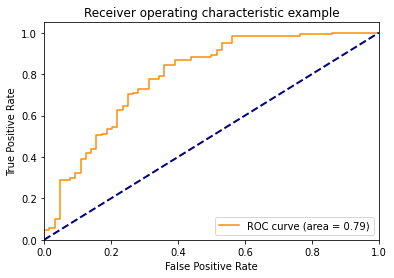

In [47]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % metrics.roc_auc_score(y_test,test_pred_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.show()

In [48]:
#Obteniendo la Curva ROC y el AUC y el GINI
print("\nCalculando el AUC del Modelo")
print("AUC del Train:", metrics.roc_auc_score(y_train,train_pred_proba))
print("AUC del Test:", metrics.roc_auc_score(y_test,test_pred_proba))
print("\nCalculando el GINI del Modelo")
print("GINI del Train:", 2 * metrics.roc_auc_score(y_train,train_pred_proba) - 1)
print("GINI del Test:", 2 * metrics.roc_auc_score(y_test,test_pred_proba) - 1)


Calculando el AUC del Modelo
AUC del Train: 0.7792774086378738
AUC del Test: 0.7892561983471075

Calculando el GINI del Modelo
GINI del Train: 0.5585548172757475
GINI del Test: 0.578512396694215


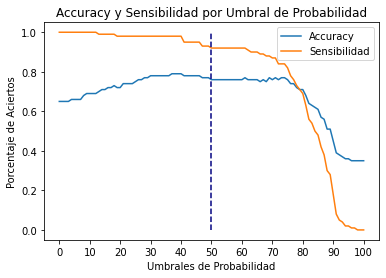

In [50]:
listAccuracy = []
listSensibilidad = []
for umbral in [prob/100 for prob in range(101)]:
  #print(umbral)  
  test_pred=(test_pred_proba > umbral).apply(int)
  listAccuracy.append(round(metrics.accuracy_score(y_test,test_pred), 2))
  listSensibilidad.append(round(metrics.recall_score(y_test,test_pred), 2))
#print(listAccuracy)
#print(listSensibilidad)

#plt.plot(listAccuracy, listSensibilidad, color='darkorange', #label='ROC curve (area = %0.2f)' % metrics.roc_auc_score(y_test,test_pred_proba))
plt.plot(listAccuracy, label = 'Accuracy')
plt.plot(listSensibilidad, label = 'Sensibilidad')
plt.plot([50, 50], [0, 1], color='navy', linestyle='--')
plt.xlabel('Umbrales de Probabilidad')
plt.ylabel('Porcentaje de Aciertos')
plt.title('Accuracy y Sensibilidad por Umbral de Probabilidad')
plt.xticks([x for x in range(0, 101, 10)])
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.legend(loc="upper right")
plt.show()

In [51]:
dfMetricas = pd.DataFrame({'corte':[prob/100 for prob in range(101)], 'Accuracy':listAccuracy, 'Sensibilidad':listSensibilidad})
dfMetricas['Acc_Sen'] = (dfMetricas['Accuracy'] + dfMetricas['Sensibilidad']) / 2
dfMetricas.sort_values(by='Acc_Sen', ascending=False)

,corte,Accuracy,Sensibilidad,Acc_Sen
38,0.38,0.79,0.98,0.885
37,0.37,0.79,0.98,0.885
40,0.40,0.79,0.98,0.885
39,0.39,0.79,0.98,0.885
30,0.30,0.78,0.98,0.880
...,...,...,...,...
96,0.96,0.35,0.01,0.180
97,0.97,0.35,0.01,0.180
98,0.98,0.35,0.00,0.175
99,0.99,0.35,0.00,0.175
